In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

## 4x4grid -> get min and range values from data

env ran for 5000 simulation seconds, etc.
We now measure the tyre_pm reward as well as the delta_wait_time to figure out the averages of both values over time, and the ranges over time too. 
These values will then be used to inform the normalisation process in the reward function. 

The environment ran for 5000 simulation seconds. During this time, we measured both the tyre_pm reward and the delta_wait_time to ascertain their averages and ranges over time. These metrics will subsequently inform the normalization process within the reward function.

For every single agent, we will subtract the reward by the average value, then divide by the range.

In [2]:
FTC_EVALUATED_PATHS = ["reward_measuring_experiment/4x4grid/diff_accum_wait_time_reward_raw",
                       "reward_measuring_experiment/4x4grid/tyre_pm_reward"]
FTC_EVALUATED_ABS = [os.path.abspath(x) for x in FTC_EVALUATED_PATHS]

In [3]:
diff_accum_wait_time_reward_raw_df = get_df_from_csv(FTC_EVALUATED_ABS[0],
                                                  eval_dir="fixed_tc",
                                                  csv_file_name="extra_metrics.csv",
                                                  seed=39)

In [4]:
diff_accum_wait_time_reward_raw_df.columns

Index(['env_step_num', 'reward_5', 'reward_15', 'reward_0', 'reward_10', 'reward_3', 'reward_12', 'reward_1', 'reward_4', 'reward_14', 'reward_6', 'reward_11', 'reward_13', 'reward_8', 'reward_9', 'reward_7', 'reward_2', 'total_agent_reward'], dtype='object')

In [5]:
descibe_diff_wait_time = diff_accum_wait_time_reward_raw_df.describe()
descibe_diff_wait_time

,env_step_num,reward_5,reward_15,reward_0,reward_10,reward_3,reward_12,reward_1,reward_4,reward_14,reward_6,reward_11,reward_13,reward_8,reward_9,reward_7,reward_2,total_agent_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,-0.083000,-0.241000,-0.115000,0.000000,-0.116000,-0.169000,-0.111000,-0.075000,-0.312000,-0.089000,-0.265000,-0.194000,-0.247000,-0.197000,-0.078000,-0.139000,-2.431000
std,288.819436,40.776008,78.033532,61.983948,67.807063,71.248641,70.917429,52.820154,52.381516,80.709719,64.559918,83.285444,67.857756,70.308273,64.931212,67.224929,69.164264,828.101393
min,0.000000,-25.000000,-70.000000,-80.000000,-154.000000,-80.000000,-77.000000,-78.000000,-77.000000,-155.000000,-75.000000,-150.000000,-70.000000,-77.000000,-65.000000,-75.000000,-79.000000,-924.000000
25%,249.750000,-20.000000,-55.000000,-53.000000,-30.000000,-55.000000,-55.000000,-33.000000,-32.000000,-55.000000,-45.000000,-59.000000,-50.000000,-52.000000,-45.000000,-45.000000,-50.000000,-676.500000
50%,499.500000,-17.000000,-45.000000,-24.500000,0.000000,-35.000000,-35.000000,-19.000000,-18.000000,-23.500000,-20.000000,-20.000000,-20.000000,-34.000000,-20.000000,-20.000000,-33.000000,-435.000000
75%,749.250000,-10.000000,46.500000,57.000000,30.250000,47.000000,48.000000,25.000000,28.000000,49.250000,23.000000,48.250000,26.250000,42.000000,22.000000,23.000000,42.000000,618.500000
max,999.000000,195.000000,217.000000,153.000000,180.000000,233.000000,225.000000,156.000000,157.000000,230.000000,230.000000,242.000000,230.000000,236.000000,226.000000,228.000000,223.000000,1992.000000


In [6]:
agent_ids = [f'reward_{id}' for id in range(0,16)]
agent_ids

['reward_0',
 'reward_1',
 'reward_2',
 'reward_3',
 'reward_4',
 'reward_5',
 'reward_6',
 'reward_7',
 'reward_8',
 'reward_9',
 'reward_10',
 'reward_11',
 'reward_12',
 'reward_13',
 'reward_14',
 'reward_15']

In [7]:
diff_accum_wait_time_reward_raw_df[agent_ids].max().max()

242.0

In [8]:
agent_ids = [f'reward_{id}' for id in range(0,16)]
print(len(agent_ids))
agent_ids_diff_wait_time_reward_max = descibe_diff_wait_time.loc['max'][agent_ids]
agent_ids_diff_wait_time_reward_max

16


reward_0     153.0
reward_1     156.0
reward_2     223.0
reward_3     233.0
reward_4     157.0
reward_5     195.0
reward_6     230.0
reward_7     228.0
reward_8     236.0
reward_9     226.0
reward_10    180.0
reward_11    242.0
reward_12    225.0
reward_13    230.0
reward_14    230.0
reward_15    217.0
Name: max, dtype: float64

In [9]:
agent_ids_diff_wait_time_reward_min = descibe_diff_wait_time.loc['min'][agent_ids]
agent_ids_diff_wait_time_reward_min

reward_0     -80.0
reward_1     -78.0
reward_2     -79.0
reward_3     -80.0
reward_4     -77.0
reward_5     -25.0
reward_6     -75.0
reward_7     -75.0
reward_8     -77.0
reward_9     -65.0
reward_10   -154.0
reward_11   -150.0
reward_12    -77.0
reward_13    -70.0
reward_14   -155.0
reward_15    -70.0
Name: min, dtype: float64

get the maximum of the the values of all agents, and get the minimum of all the values of the agents

In [10]:
agent_ids_diff_wait_time_reward_mean = descibe_diff_wait_time.loc['mean'][agent_ids]

In [11]:
print("Rewards for diff_accum_wait_time for 4x4grid env range from: ", 
      (agent_ids_diff_wait_time_reward_max.max(), agent_ids_diff_wait_time_reward_min.min()))
print("Mean Rewards for diff_accum_wait_time for 4x4grid env: ", 
      (agent_ids_diff_wait_time_reward_mean.mean()))

Rewards for diff_accum_wait_time for 4x4grid env range from:  (242.0, -155.0)
Mean Rewards for diff_accum_wait_time for 4x4grid env:  -0.1519375


## Reward function - tyre pms raw

In [12]:
tyre_pm_reward = get_df_from_csv(FTC_EVALUATED_ABS[1],
                                 eval_dir="fixed_tc",
                                 csv_file_name="extra_metrics.csv",
                                 seed=39)

In [13]:
tyre_pm_reward.columns

Index(['env_step_num', 'reward_3', 'reward_2', 'reward_7', 'reward_8', 'reward_11', 'reward_0', 'reward_12', 'reward_1', 'reward_14', 'reward_13', 'reward_6', 'reward_5', 'reward_9', 'reward_4', 'reward_10', 'reward_15', 'total_agent_reward'], dtype='object')

In [14]:
descibe_tyre_pm_reward = tyre_pm_reward.describe()
descibe_tyre_pm_reward

,env_step_num,reward_3,reward_2,reward_7,reward_8,reward_11,reward_0,reward_12,reward_1,reward_14,reward_13,reward_6,reward_5,reward_9,reward_4,reward_10,reward_15,total_agent_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,-55.389924,-55.142217,-41.338311,-55.205789,-56.945418,-63.926050,-55.404001,-50.388916,-56.244904,-41.527018,-40.727507,-36.558063,-40.823047,-50.050672,-61.470702,-46.202784,-807.345325
std,288.819436,40.473236,37.432931,29.576931,37.622151,46.008012,31.830227,40.483209,31.039515,44.494853,29.935477,25.432350,17.165625,25.155932,30.625539,44.004726,42.266782,357.113738
min,0.000000,-177.369578,-157.843529,-141.529164,-172.875419,-232.267650,-137.925485,-184.407268,-133.634273,-215.100778,-138.052299,-134.568868,-81.298908,-128.856623,-124.304129,-209.749599,-173.356661,-1704.523585
25%,249.750000,-78.816013,-81.698551,-55.276748,-79.427255,-85.130235,-94.836433,-77.792108,-72.264544,-83.562093,-54.333904,-52.273775,-49.070364,-51.965982,-72.234148,-90.601265,-66.414518,-1019.425888
50%,499.500000,-49.156725,-53.509225,-34.083759,-53.864593,-43.409644,-47.751702,-49.662762,-54.390888,-43.209052,-34.481515,-37.139457,-37.590715,-37.258028,-53.393791,-46.601375,-28.481615,-668.040776
75%,749.250000,-17.064850,-16.012641,-18.512488,-17.804116,-21.665721,-37.754773,-18.133966,-16.933608,-21.164019,-17.966335,-20.932437,-23.288388,-22.352821,-17.804782,-28.872036,-15.755762,-533.466119
max,999.000000,-2.553808,-2.990139,0.000000,-3.372655,0.000000,-3.771380,-2.388675,-2.015476,0.000000,0.000000,0.000000,0.000000,0.000000,-2.222200,0.000000,0.000000,-19.314332


In [15]:
agent_ids = [f'reward_{id}' for id in range(0,15)]
print(len(agent_ids))
agent_ids_tyre_pm_reward_max = descibe_tyre_pm_reward.loc['max'][agent_ids]
agent_ids_tyre_pm_reward_max

15


reward_0    -3.771380
reward_1    -2.015476
reward_2    -2.990139
reward_3    -2.553808
reward_4    -2.222200
reward_5     0.000000
reward_6     0.000000
reward_7     0.000000
reward_8    -3.372655
reward_9     0.000000
reward_10    0.000000
reward_11    0.000000
reward_12   -2.388675
reward_13    0.000000
reward_14    0.000000
Name: max, dtype: float64

get the maximum of the max values for all agents

In [16]:
agent_ids_tyre_pm_reward_min = descibe_tyre_pm_reward.loc['min'][agent_ids]
agent_ids_tyre_pm_reward_min.min()

-232.26765014539453

In [17]:
descibe_tyre_pm_reward_mean = descibe_tyre_pm_reward.loc['mean'][agent_ids]
descibe_tyre_pm_reward_mean

reward_0    -63.926050
reward_1    -50.388916
reward_2    -55.142217
reward_3    -55.389924
reward_4    -50.050672
reward_5    -36.558063
reward_6    -40.727507
reward_7    -41.338311
reward_8    -55.205789
reward_9    -40.823047
reward_10   -61.470702
reward_11   -56.945418
reward_12   -55.404001
reward_13   -41.527018
reward_14   -56.244904
Name: mean, dtype: float64

In [18]:
print("Rewards for diff_accum_wait_time for 4x4grid:", "\n",
      "range from: ", (agent_ids_diff_wait_time_reward_max.max(), agent_ids_diff_wait_time_reward_min.min()), "\n",
      "range: ", agent_ids_diff_wait_time_reward_max.max() - agent_ids_diff_wait_time_reward_min.min(), "\n",
      "mean: ", agent_ids_diff_wait_time_reward_mean.mean(), "\n")
print("Rewards for tyre_pm for 4x4grid: ", '\n',
      "range from: ", (agent_ids_tyre_pm_reward_max.max(), agent_ids_tyre_pm_reward_min.min()), "\n",
      "range: ", agent_ids_tyre_pm_reward_max.max() - agent_ids_tyre_pm_reward_min.min(), "\n",
      "mean: ", descibe_tyre_pm_reward_mean.mean())

Rewards for diff_accum_wait_time for 4x4grid: 
 range from:  (242.0, -155.0) 
 range:  397.0 
 mean:  -0.1519375 

Rewards for tyre_pm for 4x4grid:  
 range from:  (0.0, -232.26765014539453) 
 range:  232.26765014539453 
 mean:  -50.742836064446166


In [19]:
normalised_accum_wait_time_reward_df = (diff_accum_wait_time_reward_raw_df[:][agent_ids] - (-0.15)) / 397.0
normalised_tyre_pm_reward_df = (tyre_pm_reward[:][agent_ids] - (-50)) / 232.26

## BEFORE NORMALISATION -> before when the reward function only consisted of dividing by 100

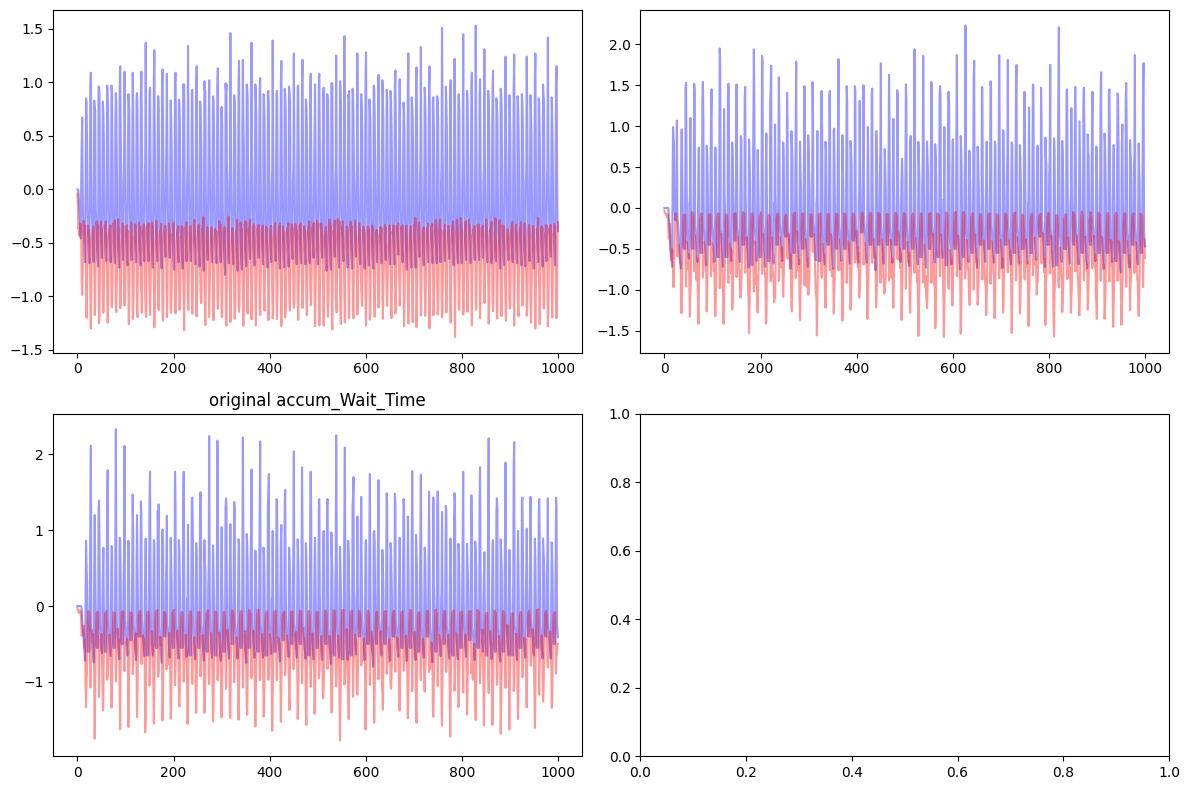

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axes[0,0].plot(diff_accum_wait_time_reward_raw_df['reward_0']/100, alpha=0.4, color='blue')
axes[0,1].plot(diff_accum_wait_time_reward_raw_df['reward_2']/100, alpha=0.4, color='blue')
axes[1,0].plot(diff_accum_wait_time_reward_raw_df['reward_3']/100, alpha=0.4, color='blue')
axes[1,0].set_title('original accum_Wait_Time')

axes[0,0].plot(tyre_pm_reward['reward_0']/100, alpha=0.4, color='red')
axes[0,1].plot(tyre_pm_reward['reward_2']/100, alpha=0.4, color='red')
axes[1,0].plot(tyre_pm_reward['reward_3']/100, alpha=0.4, color='red')
# axes[1,0].set_legend('normalised accum_Wait_Time')

plt.tight_layout()
plt.show()

## AFTER NORMALISATION

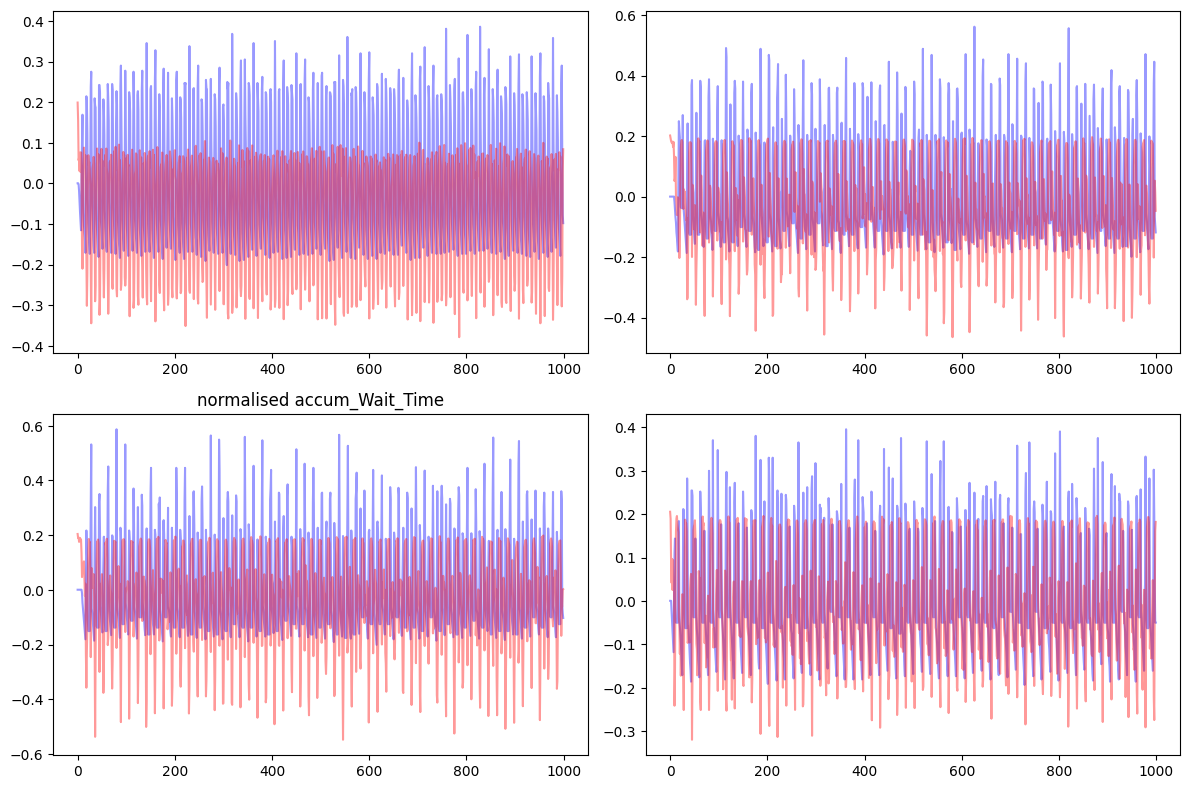

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axes[0,0].plot(normalised_accum_wait_time_reward_df['reward_0'], alpha=0.4, color='blue')
axes[0,1].plot(normalised_accum_wait_time_reward_df['reward_2'], alpha=0.4, color='blue')
axes[1,0].plot(normalised_accum_wait_time_reward_df['reward_3'], alpha=0.4, color='blue')
axes[1,1].plot(normalised_accum_wait_time_reward_df['reward_4'], alpha=0.4, color='blue')

axes[1,0].set_title('normalised accum_Wait_Time')

axes[0,0].plot(normalised_tyre_pm_reward_df['reward_0'], alpha=0.4, color='red')
axes[0,1].plot(normalised_tyre_pm_reward_df['reward_2'], alpha=0.4, color='red')
axes[1,0].plot(normalised_tyre_pm_reward_df['reward_3'], alpha=0.4, color='red')
axes[1,1].plot(normalised_tyre_pm_reward_df['reward_4'], alpha=0.4, color='red')

# axes[1,0].set_legend('normalised accum_Wait_Time')

plt.tight_layout()
plt.show()

In [22]:
normalised_tyre_pm_reward_df = (tyre_pm_reward[:][agent_ids] - (-50)) / 232.26

In [27]:
diff_accum_wait_time_reward_raw_df['total_agent_reward'].mean()/16

-0.1519375